## Importing packages

In [16]:
# EDA for Diabetes Prediction.
## Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset

In [2]:
# Load the dataset
df = pd.read_csv("diabetes_prediction_dataset.csv")

## EDA (Data Exploration)

In [6]:
# Basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None


In [7]:
print(df.head())

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [17]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


## DATA CLEANING

In [8]:
# Check for missing values
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [10]:
# Checking for missing values in the dataset
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


<Axes: >

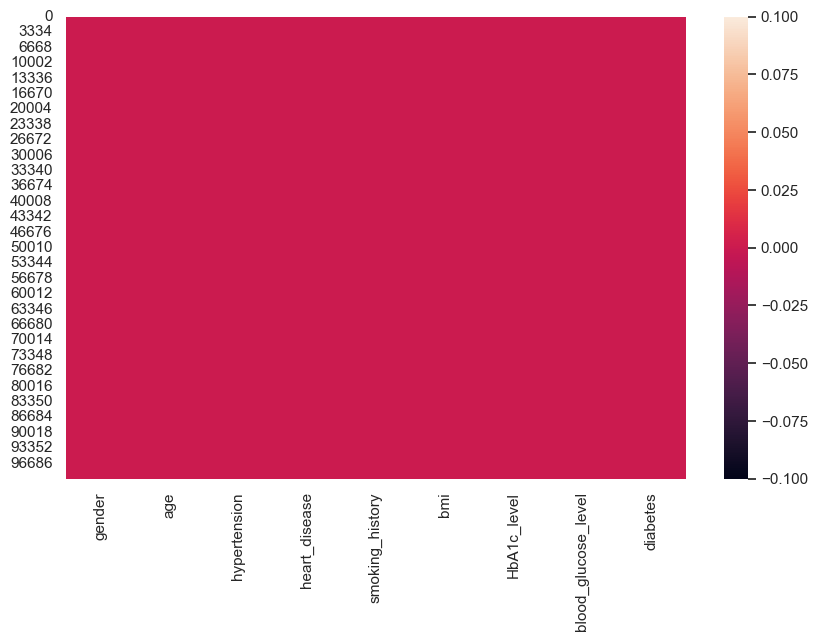

In [18]:
sns.heatmap(df.isnull())

## Checking for Duplicate values the data

In [19]:
df.duplicated().sum()

3854

In [21]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995     True
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [22]:
df.head(3)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0


In [9]:
# Setting plotting style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

## EDA
### Univariate analysis
#### Target Variable Distribution

C:\Users\homiy\AppData\Local\Temp\ipykernel_2496\2500470224.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='diabetes', palette='Set2')


<Axes: xlabel='diabetes', ylabel='count'>

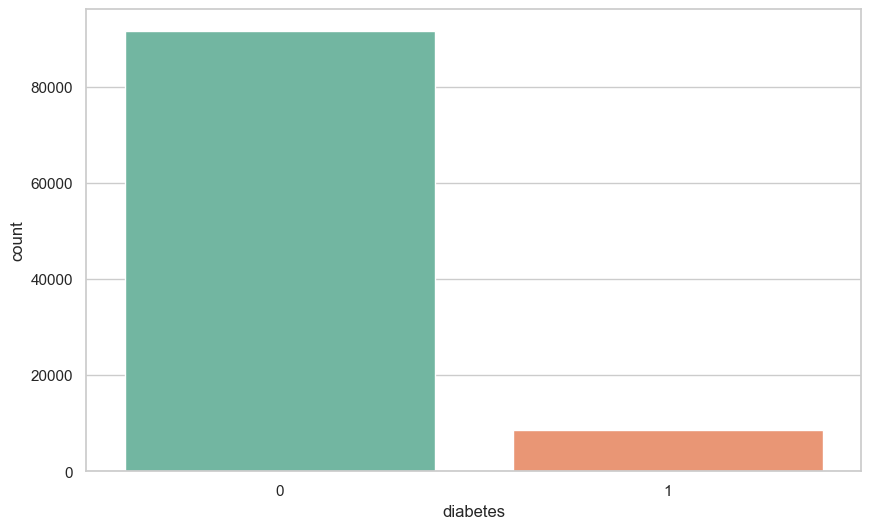

In [23]:
# Countplot for diabetes target
sns.countplot(data=df, x='diabetes', palette='Set2')

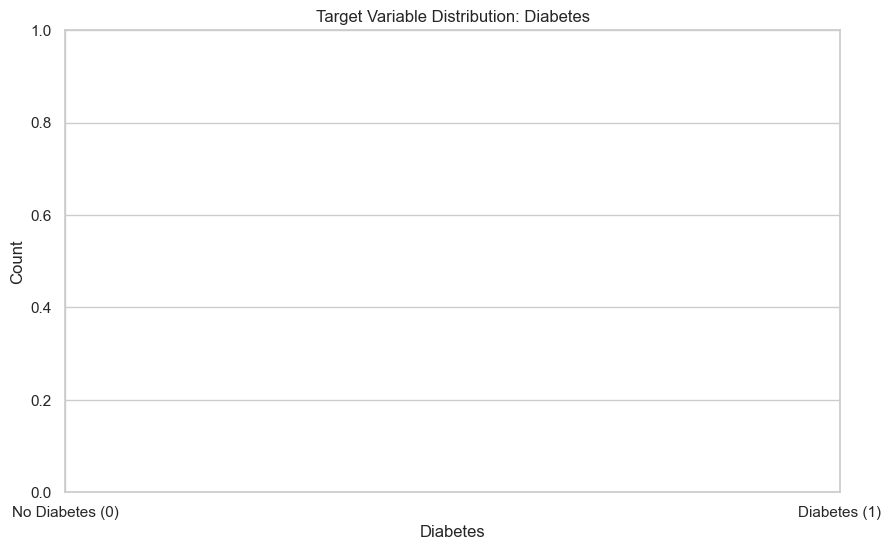

In [25]:
# Customizing the plot
plt.title('Target Variable Distribution: Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Diabetes (0)', 'Diabetes (1)'])

# Show the plot
plt.show()

In [26]:
# Show the plot
plt.show()

In [27]:
# Display value counts as text output
print("🔹 Value Counts of Target Variable:")
print(df['diabetes'].value_counts())
print("\n🔹 Proportions (%):")
print(df['diabetes'].value_counts(normalize=True) * 100)

🔹 Value Counts of Target Variable:
diabetes
0    91500
1     8500
Name: count, dtype: int64

🔹 Proportions (%):
diabetes
0    91.5
1     8.5
Name: proportion, dtype: float64


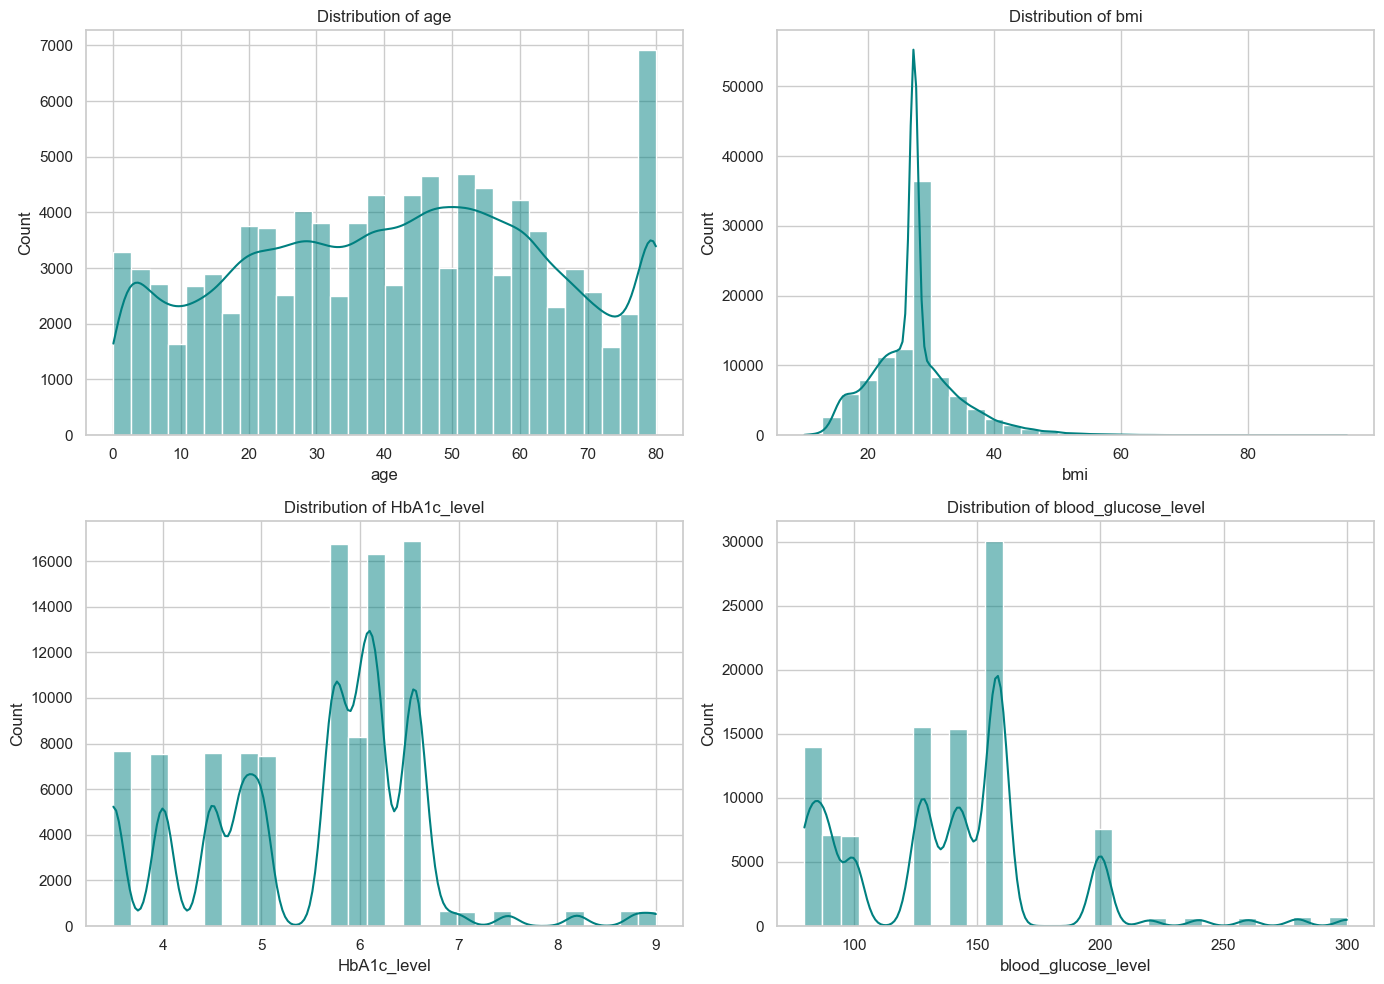

In [28]:
# Distribution plots for numerical features
numeric_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()
for i, feature in enumerate(numeric_features):
    sns.histplot(df[feature], kde=True, ax=axes[i], bins=30, color='teal')
    axes[i].set_title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

## Bivariate Analysis

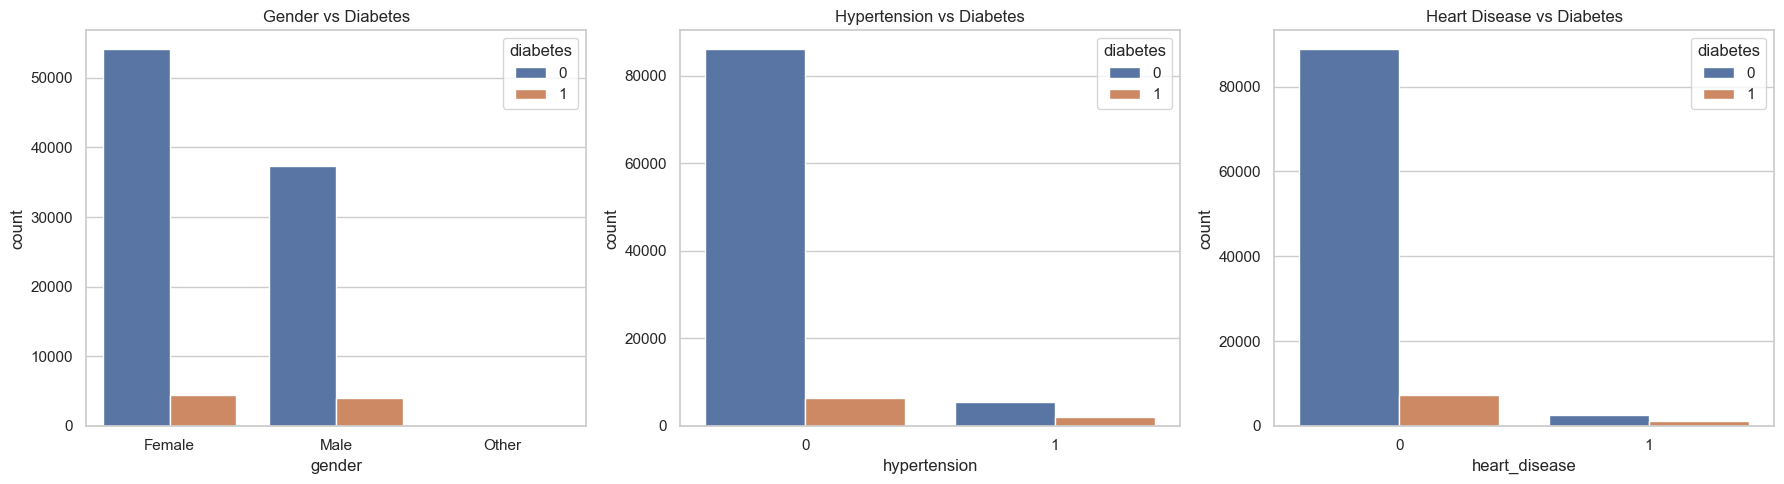

In [29]:
# Categorical features vs Target
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.countplot(data=df, x='gender', hue='diabetes', ax=axes[0])
axes[0].set_title('Gender vs Diabetes')
sns.countplot(data=df, x='hypertension', hue='diabetes', ax=axes[1])
axes[1].set_title('Hypertension vs Diabetes')
sns.countplot(data=df, x='heart_disease', hue='diabetes', ax=axes[2])
axes[2].set_title('Heart Disease vs Diabetes')
plt.tight_layout()
plt.show()

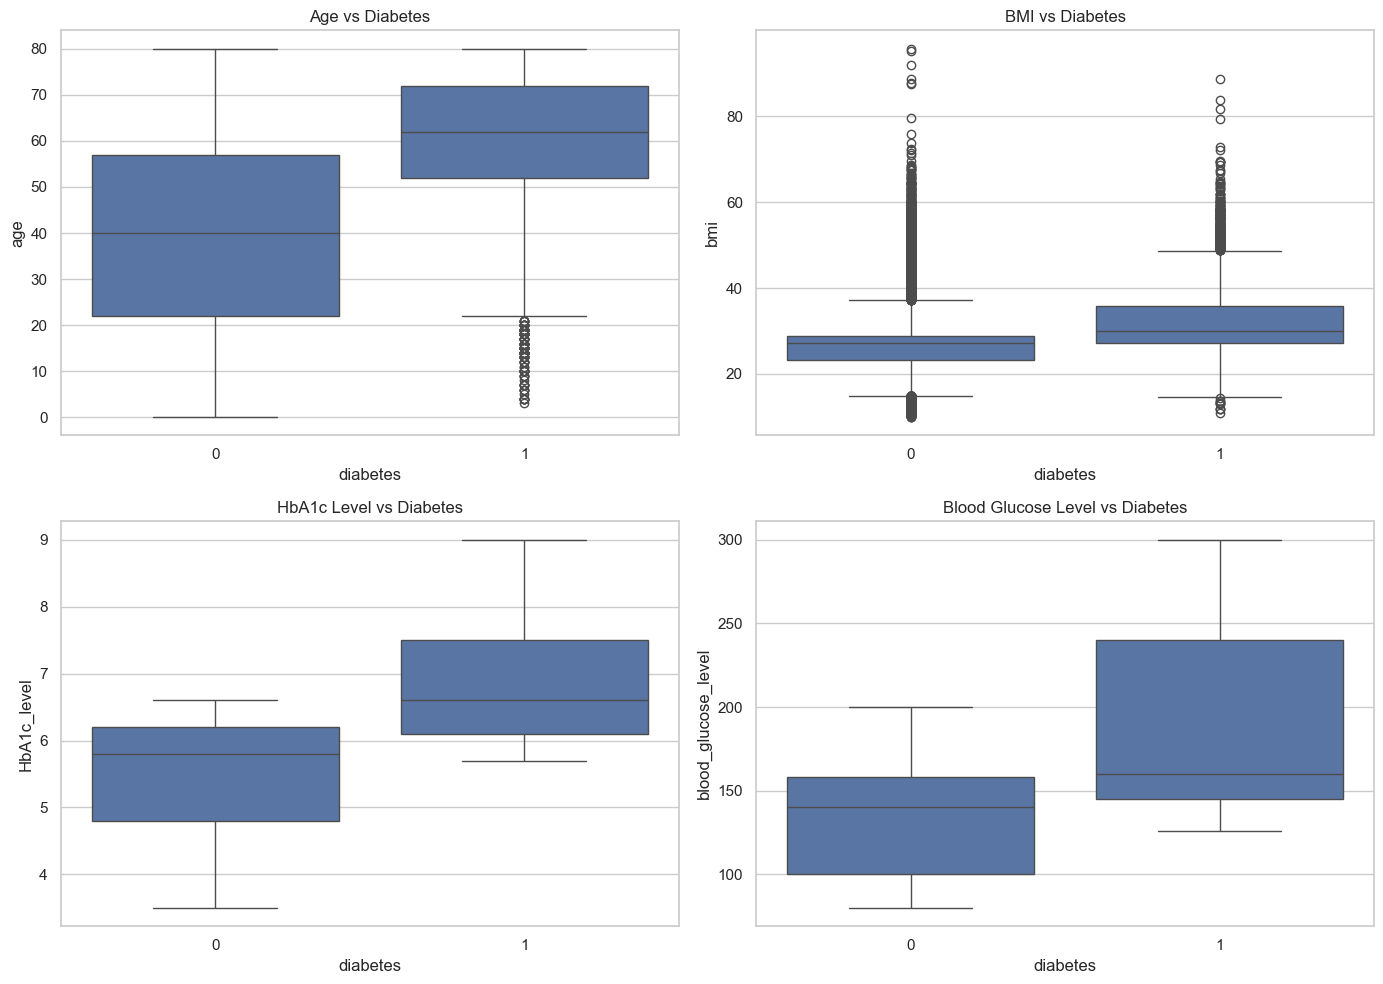

In [30]:
# Numerical features vs Diabetes using boxplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.boxplot(data=df, x='diabetes', y='age', ax=axes[0, 0])
axes[0, 0].set_title('Age vs Diabetes')
sns.boxplot(data=df, x='diabetes', y='bmi', ax=axes[0, 1])
axes[0, 1].set_title('BMI vs Diabetes')
sns.boxplot(data=df, x='diabetes', y='HbA1c_level', ax=axes[1, 0])
axes[1, 0].set_title('HbA1c Level vs Diabetes')
sns.boxplot(data=df, x='diabetes', y='blood_glucose_level', ax=axes[1, 1])
axes[1, 1].set_title('Blood Glucose Level vs Diabetes')
plt.tight_layout()

## Correlation Matrix

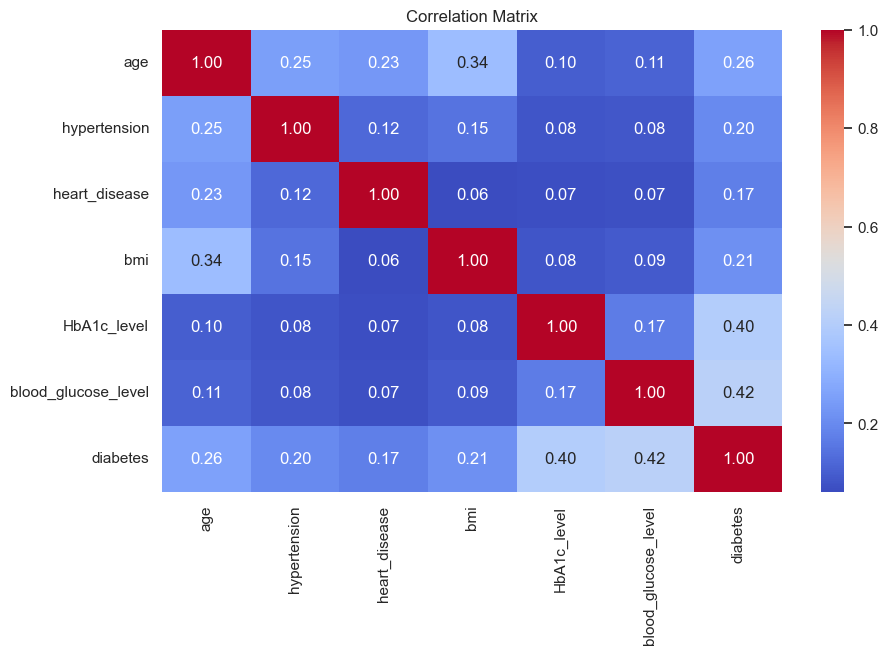

In [31]:
# Correlation matrix (numerical features only)
plt.figure(figsize=(10, 6))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Target Variable Distribution

C:\Users\homiy\AppData\Local\Temp\ipykernel_2496\3076826747.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diabetes', data=df, palette='Set2')


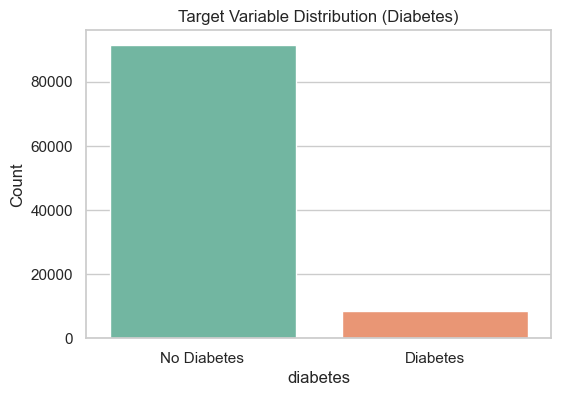

In [32]:
plt.figure(figsize=(6, 4))
sns.countplot(x='diabetes', data=df, palette='Set2')
plt.title('Target Variable Distribution (Diabetes)')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.ylabel('Count')
plt.show()

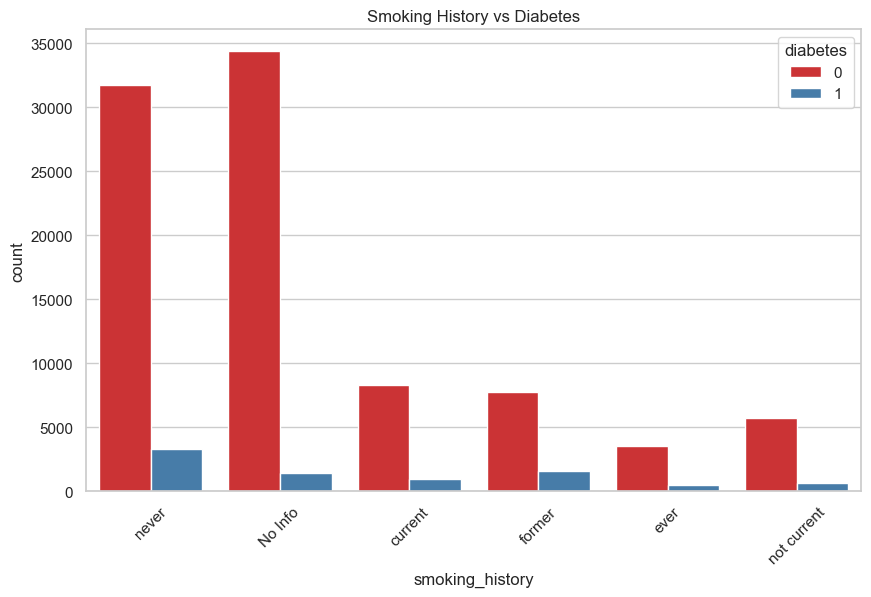

In [33]:
# Smoking History vs Diabetes
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='smoking_history', hue='diabetes', palette='Set1')
plt.title('Smoking History vs Diabetes')
plt.xticks(rotation=45)
plt.show()

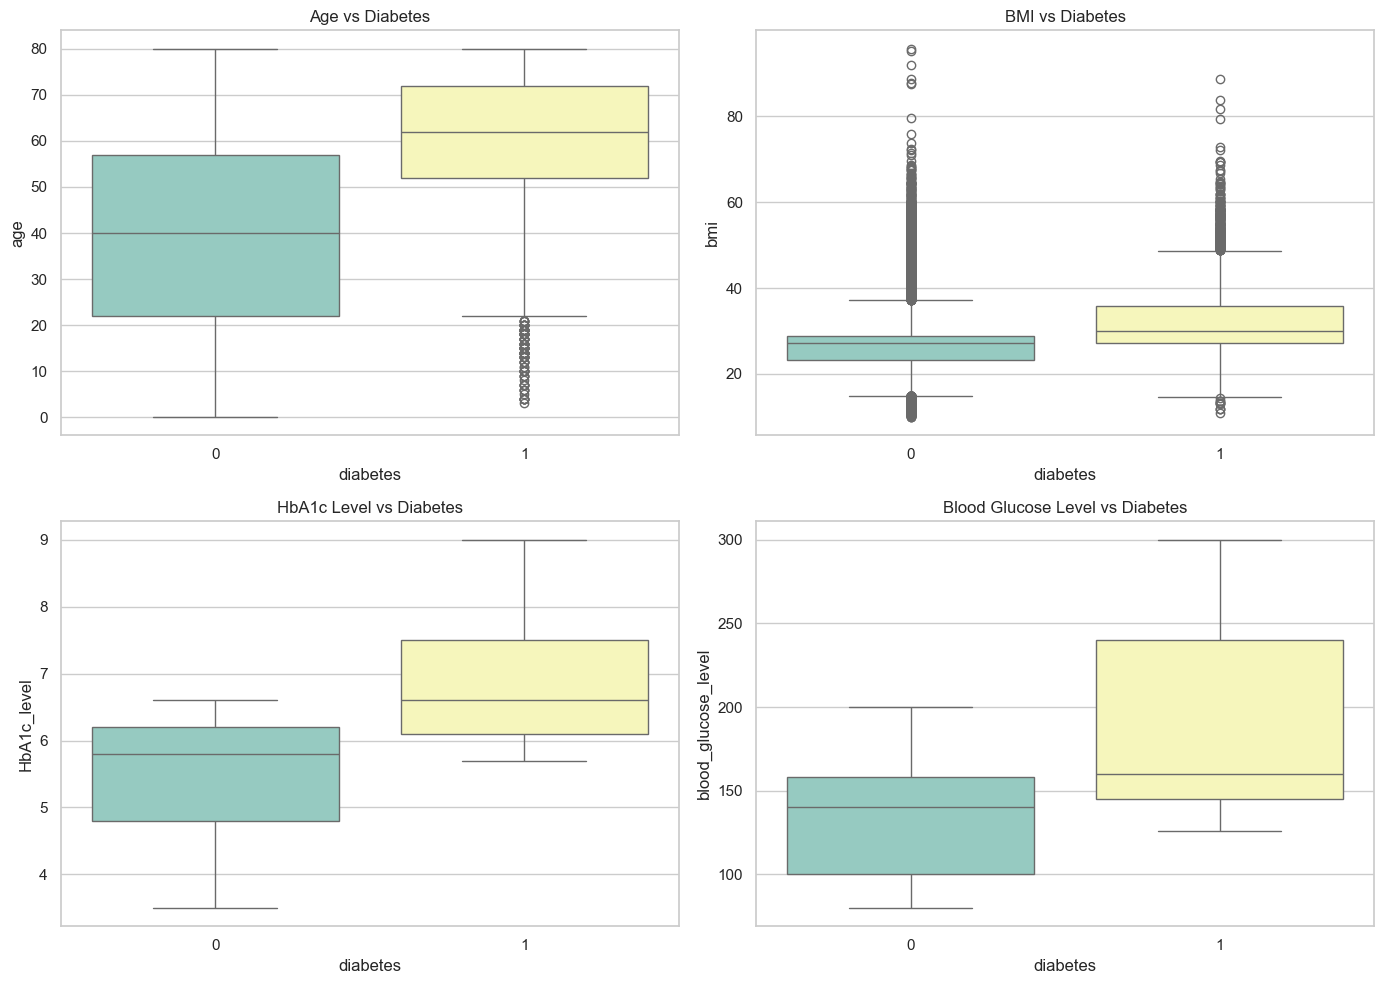

In [36]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.boxplot(data=df, x='diabetes', y='age', hue='diabetes', palette='Set3', ax=axes[0, 0], legend=False)
axes[0, 0].set_title('Age vs Diabetes')

sns.boxplot(data=df, x='diabetes', y='bmi', hue='diabetes', palette='Set3', ax=axes[0, 1], legend=False)
axes[0, 1].set_title('BMI vs Diabetes')

sns.boxplot(data=df, x='diabetes', y='HbA1c_level', hue='diabetes', palette='Set3', ax=axes[1, 0], legend=False)
axes[1, 0].set_title('HbA1c Level vs Diabetes')

sns.boxplot(data=df, x='diabetes', y='blood_glucose_level', hue='diabetes', palette='Set3', ax=axes[1, 1], legend=False)
axes[1, 1].set_title('Blood Glucose Level vs Diabetes')

plt.tight_layout()
plt.show()


In [37]:
#Descriptive Statistics by Diabetes Status
grouped_stats = df.groupby('diabetes')[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']].agg(['mean', 'median', 'std'])
print("🔹 Descriptive Statistics Grouped by Diabetes Status:")
print(grouped_stats)

🔹 Descriptive Statistics Grouped by Diabetes Status:
                age                          bmi                  HbA1c_level  \
               mean median        std       mean median       std        mean   
diabetes                                                                        
0         40.115187   40.0  22.306005  26.887163  27.32  6.373406    5.396761   
1         60.946588   62.0  14.549880  31.988382  29.97  7.558371    6.934953   

                          blood_glucose_level                    
         median       std                mean median        std  
diabetes                                                         
0           5.8  0.971628          132.852470  140.0  34.247281  
1           6.6  1.076562          194.094706  160.0  58.641111  


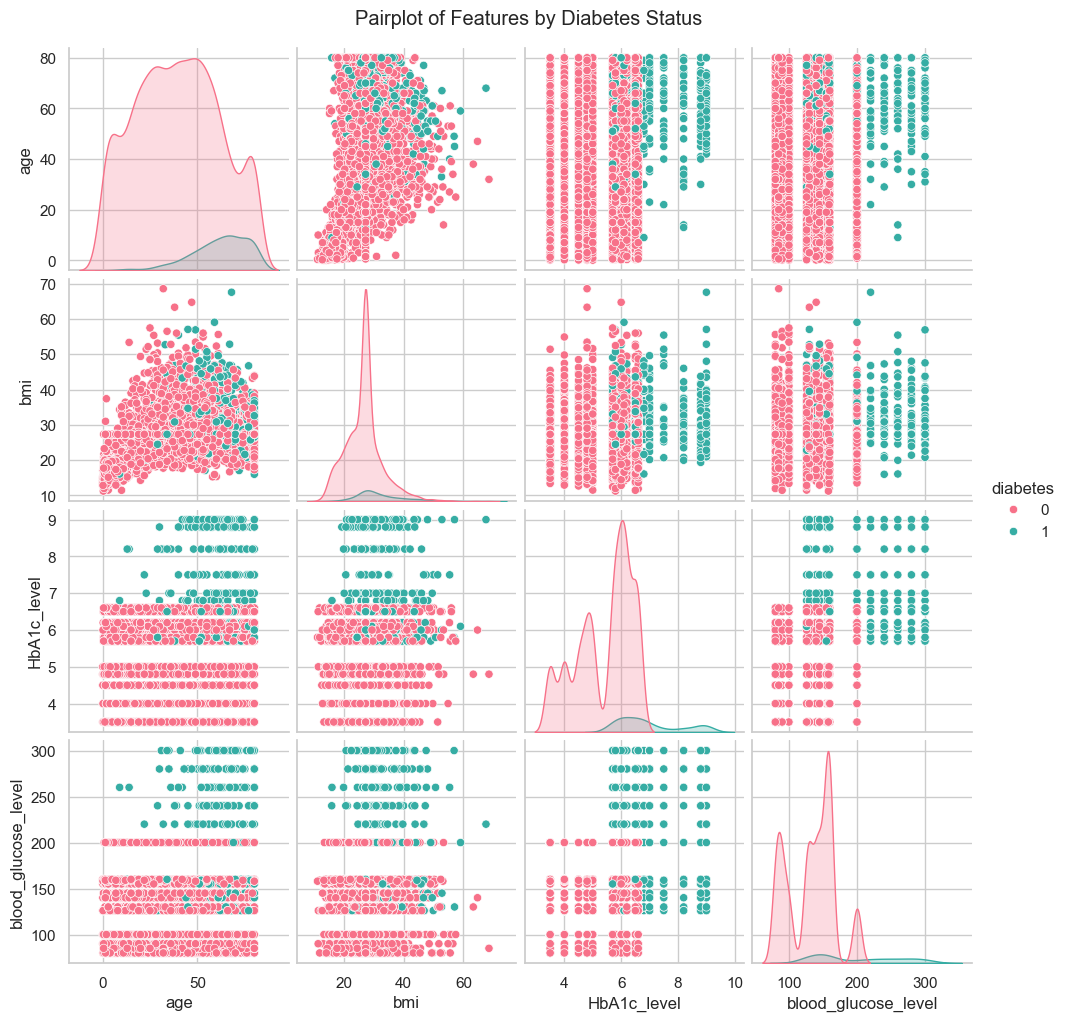

In [38]:
# Pairplot (sampled to 5000 rows for performance)
sample_df = df.sample(5000, random_state=1)
sns.pairplot(sample_df, hue='diabetes', vars=['age', 'bmi', 'HbA1c_level', 'blood_glucose_level'], palette='husl')
plt.suptitle("Pairplot of Features by Diabetes Status", y=1.02)
plt.show()

## Encoding categorical variables

In [39]:
# Check data types and unique values
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [43]:
# Getting object or category columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical Columns:", categorical_cols)

Categorical Columns: ['gender', 'smoking_history']


In [44]:
# Checking the unique values in categorical features
for col in categorical_cols:
    print(f"\n{col} unique values:\n", df[col].value_counts())


gender unique values:
 gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

smoking_history unique values:
 smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64


In [47]:
categorical_data = df.select_dtypes(include=['object', 'category'])

In [48]:
categorical_data.head()

,gender,smoking_history
0,Female,never
1,Female,No Info
2,Male,never
3,Female,current
4,Male,current


In [50]:
# Sklearn - sci-kit learn - science kit

In [51]:
# !pip install scikit-learn

In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['smoking_history'] = le.fit_transform(df['smoking_history'])


In [55]:
#Group age into categories
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 50, 70, 100], labels=['Young', 'Adult', 'Senior', 'Elder'])
df = pd.get_dummies(df, columns=['age_group'], drop_first=True)

In [58]:
categorical_data.head()

,gender,smoking_history
0,Female,never
1,Female,No Info
2,Male,never
3,Female,current
4,Male,current


In [59]:
#Creating BMI Categories
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['bmi_category'] = df['bmi'].apply(bmi_category)

# One-hot encode BMI category
df = pd.get_dummies(df, columns=['bmi_category'], drop_first=True)

In [60]:
# Create interaction features
df['age_bmi_interaction'] = df['age'] * df['bmi']
df['glucose_hba1c_interaction'] = df['blood_glucose_level'] * df['HbA1c_level']

In [61]:
print(df[['age_bmi_interaction', 'glucose_hba1c_interaction']].head())
print(df.filter(like='bmi_category').head())

   age_bmi_interaction  glucose_hba1c_interaction
0              2015.20                      924.0
1              1475.28                      528.0
2               764.96                      900.6
3               844.20                      775.0
4              1530.64                      744.0
   bmi_category_Obese  bmi_category_Overweight  bmi_category_Underweight
0               False                     True                     False
1               False                     True                     False
2               False                     True                     False
3               False                    False                     False
4               False                    False                     False


## MODEL TRAINING

In [62]:
#Split the Data (Train/Test Split)
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [63]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit only on training data, transform both
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [64]:
#Preprocessing Setup all at once
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

# Prepare features and target
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Scale features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)



## Logistic Regression

🔹 Logistic Regression Report
              precision    recall  f1-score   support

           0       0.99      0.89      0.94     18300
           1       0.42      0.89      0.57      1700

    accuracy                           0.89     20000
   macro avg       0.71      0.89      0.75     20000
weighted avg       0.94      0.89      0.90     20000

ROC AUC Score: 0.8875393764063003


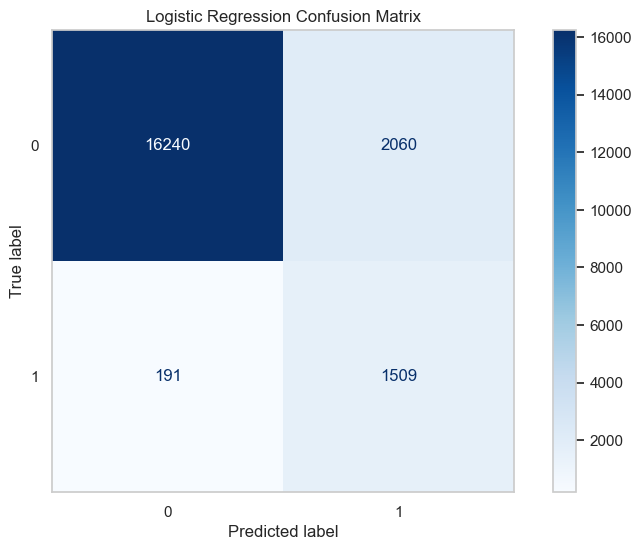

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

lr = LogisticRegression()
lr.fit(X_train_resampled, y_train_resampled)
y_pred_lr = lr.predict(X_test_scaled)

print("🔹 Logistic Regression Report")
print(classification_report(y_test, y_pred_lr))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_lr))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr, cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.grid(False)
plt.show()


## SGD Classifier

🔹 SGD Classifier Report
              precision    recall  f1-score   support

           0       0.99      0.87      0.93     18300
           1       0.40      0.91      0.55      1700

    accuracy                           0.87     20000
   macro avg       0.69      0.89      0.74     20000
weighted avg       0.94      0.87      0.90     20000

ROC AUC Score: 0.8886853101896497


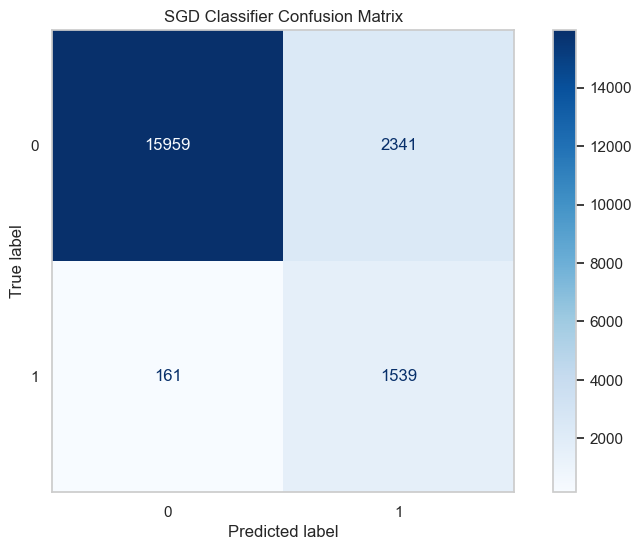

In [66]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(random_state=42)
sgd.fit(X_train_resampled, y_train_resampled)
y_pred_sgd = sgd.predict(X_test_scaled)

print("🔹 SGD Classifier Report")
print(classification_report(y_test, y_pred_sgd))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_sgd))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_sgd, cmap="Blues")
plt.title("SGD Classifier Confusion Matrix")
plt.grid(False)
plt.show()


## Random Forest

🔹 Random Forest Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18300
           1       0.77      0.75      0.76      1700

    accuracy                           0.96     20000
   macro avg       0.87      0.86      0.87     20000
weighted avg       0.96      0.96      0.96     20000

ROC AUC Score: 0.862018643522983


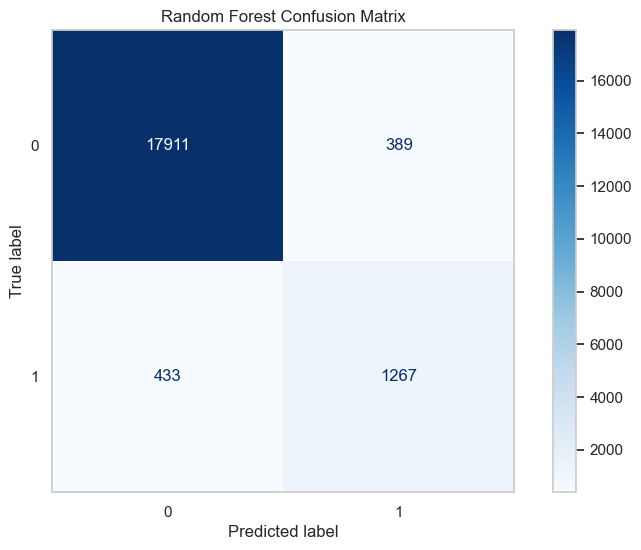

In [67]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf.predict(X_test_scaled)

print("🔹 Random Forest Report")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_rf))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.grid(False)
plt.show()


## Decision Tree

🔹 Decision Tree Report
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18300
           1       0.68      0.75      0.71      1700

    accuracy                           0.95     20000
   macro avg       0.83      0.86      0.84     20000
weighted avg       0.95      0.95      0.95     20000

ROC AUC Score: 0.8583124397299904


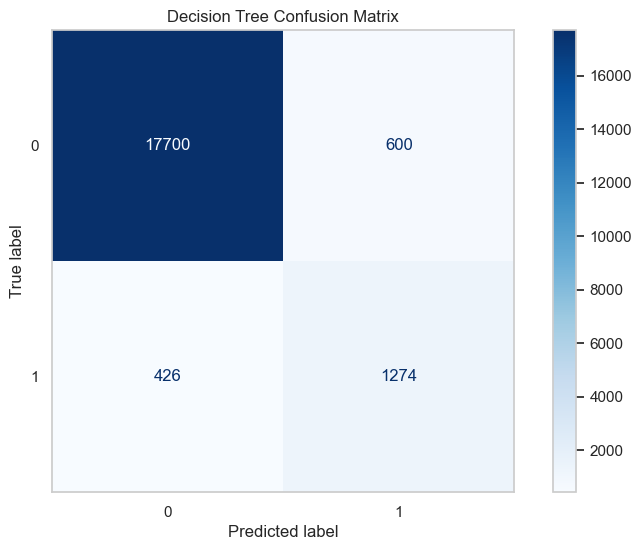

In [68]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_resampled, y_train_resampled)
y_pred_dt = dt.predict(X_test_scaled)

print("🔹 Decision Tree Report")
print(classification_report(y_test, y_pred_dt))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_dt))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt, cmap="Blues")
plt.title("Decision Tree Confusion Matrix")
plt.grid(False)
plt.show()


## Gradient Boosting

🔹 Gradient Boosting Report
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     18300
           1       0.73      0.78      0.75      1700

    accuracy                           0.96     20000
   macro avg       0.85      0.88      0.86     20000
weighted avg       0.96      0.96      0.96     20000

ROC AUC Score: 0.875380906460945


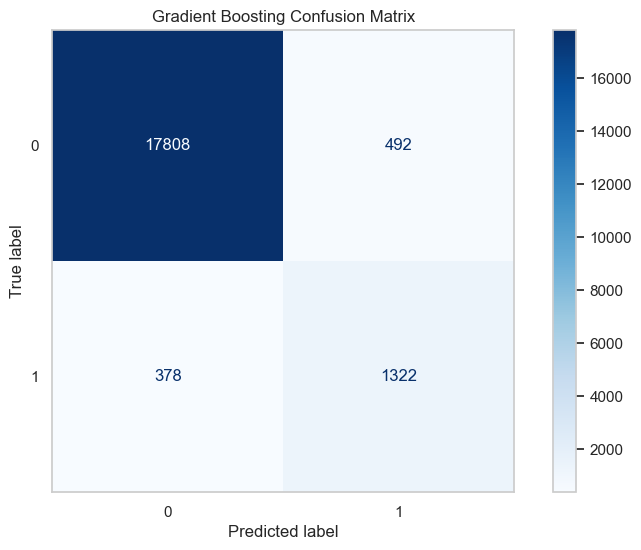

In [69]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train_resampled, y_train_resampled)
y_pred_gb = gb.predict(X_test_scaled)

print("🔹 Gradient Boosting Report")
print(classification_report(y_test, y_pred_gb))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_gb))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_gb, cmap="Blues")
plt.title("Gradient Boosting Confusion Matrix")
plt.grid(False)
plt.show()


## Performance Comparison Table

In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Initialize a dictionary to store metrics
results = {}

# Define a function to evaluate each model
def evaluate_model(name, y_true, y_pred):
    results[name] = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred),
        'ROC AUC': roc_auc_score(y_true, y_pred)
    }

# Evaluate each model
evaluate_model('Logistic Regression', y_test, y_pred_lr)
evaluate_model('SGD Classifier', y_test, y_pred_sgd)
evaluate_model('Decision Tree', y_test, y_pred_dt)
evaluate_model('Random Forest', y_test, y_pred_rf)
evaluate_model('Gradient Boosting', y_test, y_pred_gb)

# Convert to DataFrame
results_df = pd.DataFrame(results).T
results_df = results_df.round(4)
results_df.sort_values(by='F1 Score', ascending=False, inplace=True)

# Display the table
print("📊 Model Performance Comparison:")
display(results_df)


📊 Model Performance Comparison:


,Accuracy,Precision,Recall,F1 Score,ROC AUC
Random Forest,0.9589,0.7651,0.7453,0.7551,0.8620
Gradient Boosting,0.9565,0.7288,0.7776,0.7524,0.8754
Decision Tree,0.9487,0.6798,0.7494,0.7129,0.8583
Logistic Regression,0.8874,0.4228,0.8876,0.5728,0.8875
SGD Classifier,0.8749,0.3966,0.9053,0.5516,0.8887
